In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from processing.processing import PreProcessing
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [10]:
data = PreProcessing.read_davidson_data("data/Davidson&al.csv")
other = PreProcessing.read_stormfrontws_data("data/StormfrontWS.csv")

In [11]:
clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier()),])
clf = clf.fit(data["tweet"], data["class"])

In [12]:
docs_new = ["Hey, panini head! Are you listening?", "You're an idiot sandwich", "Fuck off you fat useless sack of fucking yankee dankee doodle shite", "You surprise me as to how bad you are", "Fuck off! Fuck off! Fuck off! Fuck off!", "You guys cook like old people.", "There’s enough garlic in here to kill every vampire in Europe.", "This soufflé has sunk so badly James Cameron wants to make a film about it.", "He cant's count to fucking two!", "You deserve a kick in the nuts", "You look like you're just about to lose your virginity.", "You're a fucking disgrace"]
docs_new_sanitized = [PreProcessing.sanitize_tweet(s) for s in docs_new]
predicted = clf.predict(docs_new_sanitized)
for x,y in zip(docs_new, predicted):
    print(x, "->", y)

Hey, panini head! Are you listening? -> offensive language
You're an idiot sandwich -> normal
Fuck off you fat useless sack of fucking yankee dankee doodle shite -> offensive language
You surprise me as to how bad you are -> offensive language
Fuck off! Fuck off! Fuck off! Fuck off! -> offensive language
You guys cook like old people. -> offensive language
There’s enough garlic in here to kill every vampire in Europe. -> offensive language
This soufflé has sunk so badly James Cameron wants to make a film about it. -> offensive language
He cant's count to fucking two! -> offensive language
You deserve a kick in the nuts -> normal
You look like you're just about to lose your virginity. -> normal
You're a fucking disgrace -> offensive language


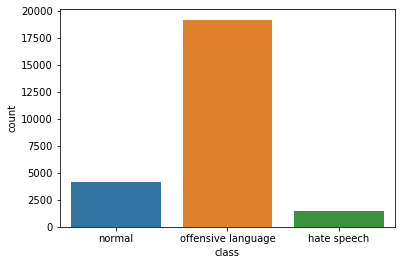

In [13]:
sns.countplot(x="class", data=data)

In [14]:
print(metrics.classification_report(data["class"], clf.predict(data["tweet"])))

precision    recall  f1-score   support

       hate speech       0.96      0.18      0.30      1430
            normal       0.88      0.94      0.91      4163
offensive language       0.94      0.98      0.96     19190

          accuracy                           0.93     24783
         macro avg       0.93      0.70      0.72     24783
      weighted avg       0.93      0.93      0.91     24783



In [15]:
data = data.append(other[other["class"] == "hate speech" | other["class"] == "normal"])

,class,tweet
0,normal,!!! RT @mayasolovely: As a woman you shouldn't...
1,offensive language,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,offensive language,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,offensive language,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,offensive language,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
10908,hate speech,ye steal anyth white think white owe someth ok...
10909,hate speech,use way intimida jew show still peopl aginst o...
10930,hate speech,pray babboon mongoloid children seed continu e...
10933,hate speech,trudeau white obama care peopl canada third wo...


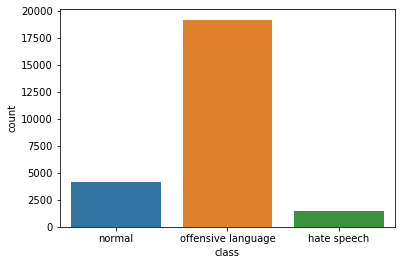

In [16]:
sns.countplot(x="class", data=data)